In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0],28*28)
x_test = x_test.reshape(x_test.shape[0],28*28)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype('float32')/255.0

In [4]:
!pip install sklearn
from sklearn.preprocessing import LabelBinarizer

In [5]:
lb = LabelBinarizer()

In [6]:
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation="sigmoid")) #imp
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
from tensorflow.keras.optimizers import SGD

In [10]:
sgd = SGD(0.01)

In [11]:
model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
H = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128)

Epoch 1/10


469/469 [==============================] - 7s 9ms/step - loss: 2.2822 - accuracy: 0.1629 - val_loss: 2.2485 - val_accuracy: 0.3122
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 2.2215 - accuracy: 0.3474 - val_loss: 2.1882 - val_accuracy: 0.4845
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 2.1532 - accuracy: 0.4895 - val_loss: 2.1065 - val_accuracy: 0.5234
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 2.0582 - accuracy: 0.5476 - val_loss: 1.9931 - val_accuracy: 0.5885
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 1.9288 - accuracy: 0.5965 - val_loss: 1.8435 - val_accuracy: 0.6081
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 1.7673 - accuracy: 0.6223 - val_loss: 1.6683 - val_accuracy: 0.6399
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 1.5886 - accuracy: 0.6534 - val_loss: 1.4855 - val_accuracy: 0.6642
Epoc

In [12]:
predictions = model.predict(x_test,batch_size=128)

79/79 [==============================] - 1s 5ms/step


In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       980
           1       0.75      0.98      0.85      1135
           2       0.86      0.67      0.75      1032
           3       0.68      0.88      0.77      1010
           4       0.63      0.75      0.69       982
           5       0.85      0.37      0.52       892
           6       0.81      0.89      0.85       958
           7       0.77      0.87      0.82      1028
           8       0.75      0.62      0.68       974
           9       0.63      0.42      0.50      1009

    accuracy                           0.75     10000
   macro avg       0.76      0.74      0.73     10000
weighted avg       0.75      0.75      0.73     10000



In [15]:
import matplotlib.pyplot as plt
import numpy as np

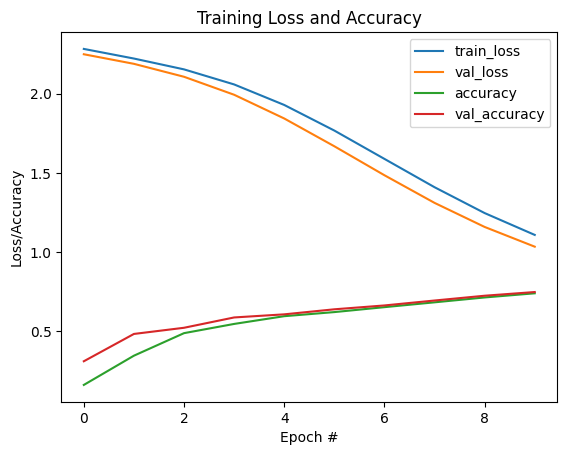

In [16]:
plt.plot(np.arange(0,10),H.history["loss"],label='train_loss')
plt.plot(np.arange(0,10),H.history["val_loss"],label='val_loss')
plt.plot(np.arange(0,10),H.history["accuracy"],label='accuracy')
plt.plot(np.arange(0,10),H.history["val_accuracy"],label='val_accuracy')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
